<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/Correlations_Nawungan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
#Reading dataset dalam format data Excel
df = pd.read_excel('/content/Nawungan_15 Minutes_PM.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()

,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2019-03-23 13:45:00,2019,82,13.75,35.33,98.1,0.6,495.300293,0.012626,1.005232,...,1253.501011,322.091168,38.924002,69,288.429159,1.038345,0.423814,h,0.120000,m
3,2019-03-23 14:00:00,2019,82,14,35.2,98.07,0.6,476.44043,0.012626,1.005232,...,1252.053277,322.091168,37.458473,69,277.162717,0.997786,0.40726,rc day,69.000000,s/m
4,2019-03-23 14:15:00,2019,82,14.25,35.56,98.1,0.8,564.51416,0.012626,1.005232,...,1251.928438,241.568376,44.276054,69,325.377537,1.171359,0.478106,rc night,690.000000,s/m
5,2019-03-23 14:30:00,2019,82,14.5,34.94,98.1,0.9,493.835449,0.012626,1.005232,...,1249.215979,214.727445,38.773533,69,281.796996,1.014469,0.414069,Latitude,-7.964911,degrees
6,2019-03-23 14:45:00,2019,82,14.75,34.51,98.08,0.5,322.08252,0.012626,1.005232,...,1247.027952,386.509401,25.507475,69,188.38674,0.678192,0.276813,Longitude,110.405090,degrees


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91689 entries, 2 to 91690
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         91689 non-null  object 
 1   Year         91689 non-null  object 
 2   DOY          91689 non-null  object 
 3   Time         91689 non-null  object 
 4   T            91689 non-null  object 
 5   RH           91689 non-null  object 
 6   U            91689 non-null  object 
 7   Rs           91689 non-null  object 
 8   Dec          91689 non-null  object 
 9   dr           91689 non-null  object 
 10  t.c.         91689 non-null  object 
 11  angh         91689 non-null  object 
 12  cos θ        91689 non-null  object 
 13  Rs pot       91689 non-null  object 
 14  TRA          91689 non-null  float64
 15  Rb           91689 non-null  object 
 16  es           91689 non-null  object 
 17  e            91689 non-null  object 
 18  VPD          91689 non-null  object 
 19  Rn  

In [4]:
#Mengubah Tipe data menjadi Float
df[['Rs', 'RH', 'U', 'T', 'ET']] = df[['Rs', 'RH', 'U', 'T', 'ET']].astype(float)
#Deskripsi statistik dari parameter cuaca dan ET
df[['Rs', 'RH', 'U', 'T', 'ET']].describe()


,Rs,RH,U,T,ET
count,91689.000000,91689.00000,91689.000000,91689.000000,91689.000000
mean,197.252505,98.43691,0.467068,27.385514,0.186459
std,283.117804,0.18290,0.377165,5.168815,0.266269
min,0.000000,97.71000,0.100000,17.690000,-0.010124
25%,0.000000,98.31000,0.200000,23.450000,0.000018
50%,1.647949,98.44000,0.300000,25.020000,0.008768
75%,371.520996,98.57000,0.700000,31.740000,0.350675
max,1114.196777,99.06000,3.300000,42.130000,1.035958


In [7]:
correlation_Rs = df['Rs'].corr(df['ET'])

print('Korelasi Radiasi Matahari dan Evapotranspirasi :', correlation_Rs)

Korelasi Radiasi Matahari dan Evapotranspirasi : 0.9951437687021993


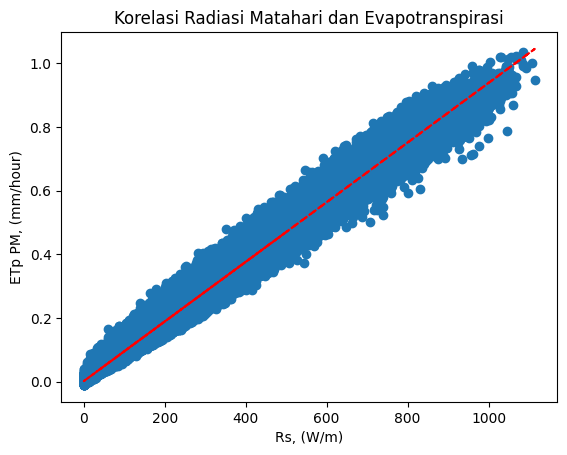

In [8]:
import matplotlib.pyplot as plt

#Scatter Plot
plt.scatter(df['Rs'], df['ET'])

#Menambah garis linear regresi
x = df['Rs']
y = df['ET']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")

#Label dan Judul
plt.xlabel('Rs, (W/m)')
plt.ylabel('ETp PM, (mm/hour)')
plt.title('Korelasi Radiasi Matahari dan Evapotranspirasi')

plt.show()

Korelasi Suhu Udara dan Evapotranspirasi : 0.8865525958304569


Text(0.5, 1.0, 'Korelasi Suhu Udara dan Evapotranspirasi')

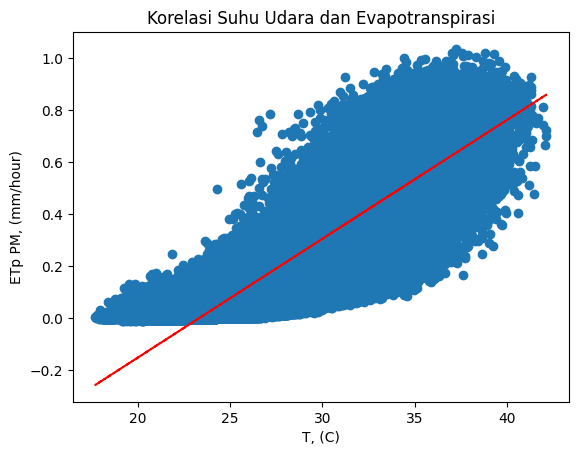

In [9]:
#Suhu Udara (T) VS ET
correlation_T = df['T'].corr(df['ET'])

print('Korelasi Suhu Udara dan Evapotranspirasi :', correlation_T)

#Scatter Plot
plt.scatter(df['T'], df['ET'])

#Menambah garis linear regresi
x = df['T']
y = df['ET']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")

#Label dan Judul
plt.xlabel('T, (C)')
plt.ylabel('ETp PM, (mm/hour)')
plt.title('Korelasi Suhu Udara dan Evapotranspirasi')

Korelasi Suhu Udara dan Evapotranspirasi : -0.16949123738460875


Text(0.5, 1.0, 'Korelasi Kelembaban Udara dan Evapotranspirasi')

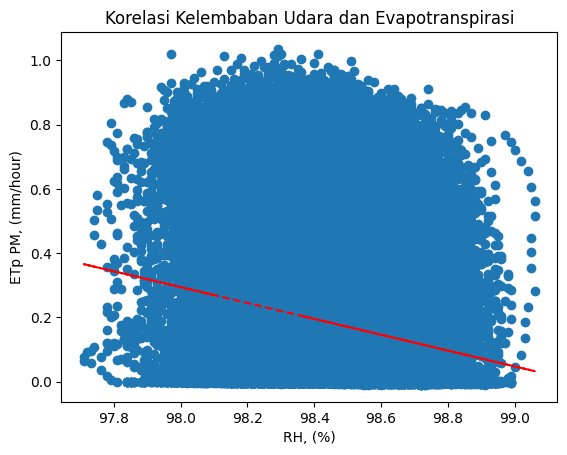

In [10]:
#Kelembaban Udara (RH) VS ET
correlation_RH = df['RH'].corr(df['ET'])

print('Korelasi Suhu Udara dan Evapotranspirasi :', correlation_RH)

#Scatter Plot
plt.scatter(df['RH'], df['ET'])

#Menambah garis linear regresi
x = df['RH']
y = df['ET']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")

#Label dan Judul
plt.xlabel('RH, (%)')
plt.ylabel('ETp PM, (mm/hour)')
plt.title('Korelasi Kelembaban Udara dan Evapotranspirasi')

Korelasi Kecepatan Angin dan Evapotranspirasi : 0.5341404161678839


Text(0.5, 1.0, 'Korelasi Kecepatan Angin dan Evapotranspirasi')

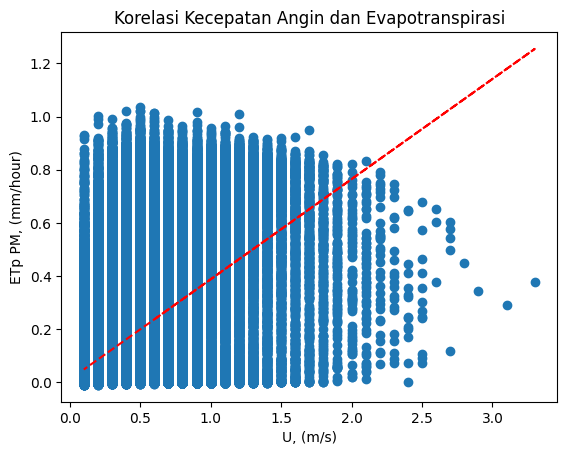

In [11]:
#Kelembaban Udara (u) VS ET
correlation_u = df['U'].corr(df['ET'])

print('Korelasi Kecepatan Angin dan Evapotranspirasi :', correlation_u)

#Scatter Plot
plt.scatter(df['U'], df['ET'])

#Menambah garis linear regresi
x = df['U']
y = df['ET']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")

#Label dan Judul
plt.xlabel('U, (m/s)')
plt.ylabel('ETp PM, (mm/hour)')
plt.title('Korelasi Kecepatan Angin dan Evapotranspirasi')